In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [46]:
# Load the data
print("Loading fresh data...")
df = pd.read_csv("../data/Housing.csv")

print("\nOriginal columns:")
print(df.columns.tolist())

print("\nFirst few rows of original data:")
df.head()

Loading fresh data...

Original columns:
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

First few rows of original data:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [47]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

print("Before conversion:")
for col in binary_cols:
    print(f"{col}: {df[col].unique()}")


for col in binary_cols:
    # Convert to lowercase and strip whitespace
    df[col] = df[col].str.lower().str.strip()
    # Map 'yes' to 1 and 'no' to 0
    df[col] = df[col].map({'yes': 1, 'no': 0})

print("\nAfter conversion:")
for col in binary_cols:
    print(f"{col}: {df[col].unique()}")

df.head()

Before conversion:
mainroad: ['yes' 'no']
guestroom: ['no' 'yes']
basement: ['no' 'yes']
hotwaterheating: ['no' 'yes']
airconditioning: ['yes' 'no']
prefarea: ['yes' 'no']

After conversion:
mainroad: [1 0]
guestroom: [0 1]
basement: [0 1]
hotwaterheating: [0 1]
airconditioning: [1 0]
prefarea: [1 0]


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [57]:
# The 'furnishingstatus' column has already been one-hot encoded and removed.
# Skipping one-hot encoding step to avoid KeyError.
print("\nColumns after one-hot encoding (already done):")
print(df.columns.tolist())

# Converting boolean values to integers
bool_cols = ['furnishing_furnished', 'furnishing_semi-furnished', 'furnishing_unfurnished']
for col in bool_cols:
    print(f"\nChecking {col} before conversion:")
    print(df[col].value_counts())
    df[col] = df[col].astype(int)  # More direct way to convert boolean to int
    print(f"After conversion:")
    print(df[col].value_counts())

# Verify that each row has exactly one 1 among the furnishing columns
furnishing_sum = df[bool_cols].sum(axis=1)
print("\nVerification: Sum of furnishing columns for each row (should all be 1):")
print(furnishing_sum.value_counts())

# Show the first few rows to verify the changes
print("\nFirst few rows of the dataset:")
df.head()


Columns after one-hot encoding (already done):
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishing_furnished', 'furnishing_semi-furnished', 'furnishing_unfurnished']

Checking furnishing_furnished before conversion:
furnishing_furnished
0    405
1    140
Name: count, dtype: int64
After conversion:
furnishing_furnished
0    405
1    140
Name: count, dtype: int64

Checking furnishing_semi-furnished before conversion:
furnishing_semi-furnished
0    318
1    227
Name: count, dtype: int64
After conversion:
furnishing_semi-furnished
0    318
1    227
Name: count, dtype: int64

Checking furnishing_unfurnished before conversion:
furnishing_unfurnished
0    367
1    178
Name: count, dtype: int64
After conversion:
furnishing_unfurnished
0    367
1    178
Name: count, dtype: int64

Verification: Sum of furnishing columns for each row (should all be 1):
1    545
Name: count, dtype: int6

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing_furnished,furnishing_semi-furnished,furnishing_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [49]:
# Converting boolean values to integers
bool_cols = ['furnishing_furnished', 'furnishing_semi-furnished', 'furnishing_unfurnished']
for col in bool_cols:
    print(f"\nChecking {col} before conversion:")
    print(df[col].value_counts())
    df[col] = df[col].astype(int)  # More direct way to convert boolean to int
    print(f"After conversion:")
    print(df[col].value_counts())

# Verify that each row has exactly one 1 among the furnishing columns
furnishing_sum = df[bool_cols].sum(axis=1)
print("\nVerification: Sum of furnishing columns for each row (should all be 1):")
print(furnishing_sum.value_counts())

# Show the first few rows to verify the changes
print("\nFirst few rows of the dataset:")
df.head()


Checking furnishing_furnished before conversion:
furnishing_furnished
0    405
1    140
Name: count, dtype: int64
After conversion:
furnishing_furnished
0    405
1    140
Name: count, dtype: int64

Checking furnishing_semi-furnished before conversion:
furnishing_semi-furnished
0    318
1    227
Name: count, dtype: int64
After conversion:
furnishing_semi-furnished
0    318
1    227
Name: count, dtype: int64

Checking furnishing_unfurnished before conversion:
furnishing_unfurnished
0    367
1    178
Name: count, dtype: int64
After conversion:
furnishing_unfurnished
0    367
1    178
Name: count, dtype: int64

Verification: Sum of furnishing columns for each row (should all be 1):
1    545
Name: count, dtype: int64

First few rows of the dataset:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing_furnished,furnishing_semi-furnished,furnishing_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   price                      545 non-null    int64
 1   area                       545 non-null    int64
 2   bedrooms                   545 non-null    int64
 3   bathrooms                  545 non-null    int64
 4   stories                    545 non-null    int64
 5   mainroad                   545 non-null    int64
 6   guestroom                  545 non-null    int64
 7   basement                   545 non-null    int64
 8   hotwaterheating            545 non-null    int64
 9   airconditioning            545 non-null    int64
 10  parking                    545 non-null    int64
 11  prefarea                   545 non-null    int64
 12  furnishing_furnished       545 non-null    bool 
 13  furnishing_semi-furnished  545 non-null    bool 
 14  furnishing_unfurnished    

In [8]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Text(0.5, 1.0, 'Distribution of House Prices')

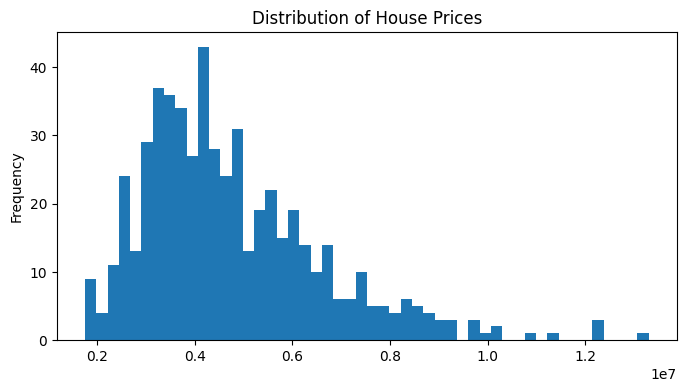

In [56]:
df['price'].plot(kind='hist', bins=50, figsize=(8,4))
plt.title("Distribution of House Prices")

Text(0, 0.5, 'Frequency')

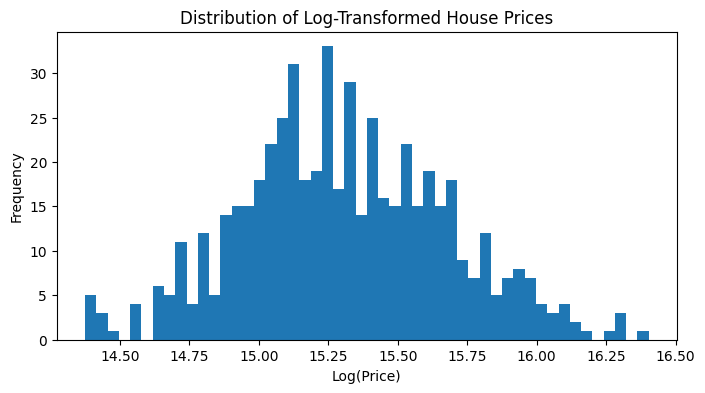

In [55]:
plt.figure(figsize=(8,4))
df['price'].apply(np.log).plot(kind='hist', bins=50)
plt.title("Distribution of Log-Transformed House Prices")
plt.xlabel("Log(Price)")
plt.ylabel("Frequency")

<Axes: xlabel='bedrooms', ylabel='price'>

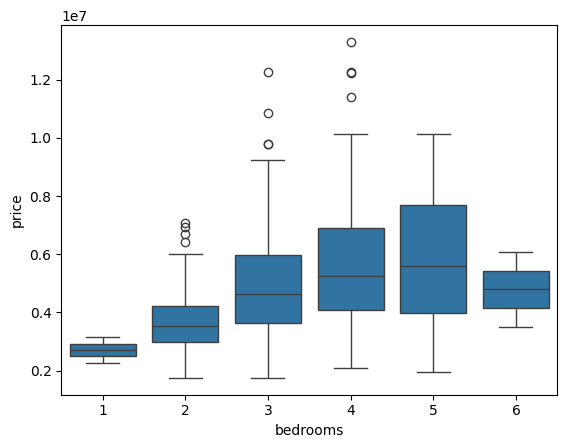

In [13]:
sns.boxplot(x=df['bedrooms'], y = df['price'])

Text(0.5, 1.0, 'House Price vs Area')

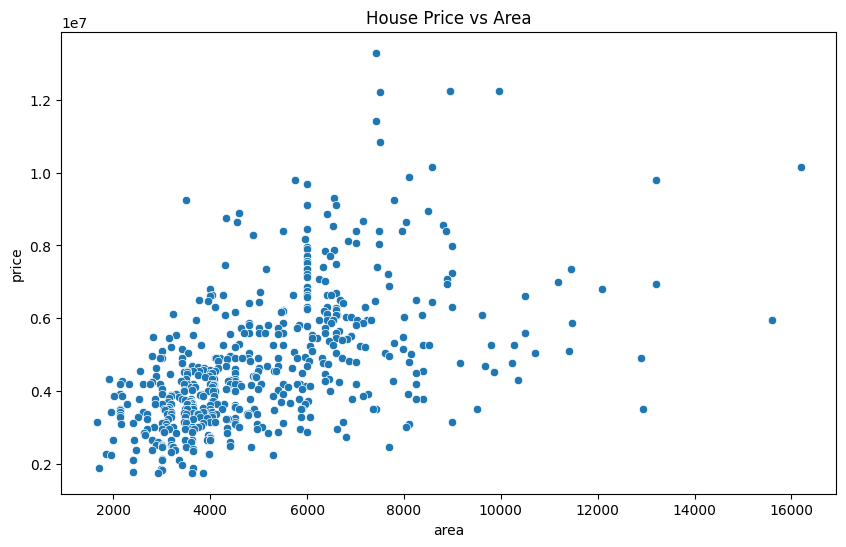

In [54]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='area', y='price', data=df)
plt.title('House Price vs Area')

<Axes: >

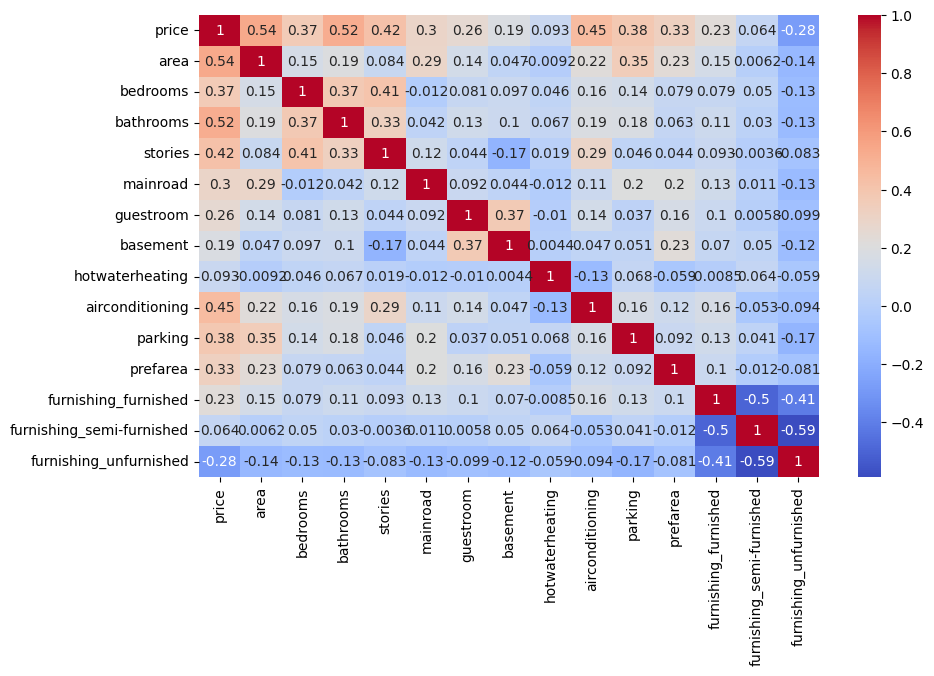

In [53]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [93]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    scores[name] = score
    print(f"{name}: R2 Score = {score:.4f}")

Linear Regression: R2 Score = 0.6529
Decision Tree: R2 Score = 0.4070
Random Forest: R2 Score = 0.6121
Gradient Boosting: R2 Score = 0.6665
XGBoost: R2 Score = 0.5938


C:\Users\ajitp\AppData\Local\Temp\ipykernel_17776\555390255.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2 Score', y='Model', data=score_df, palette='viridis')


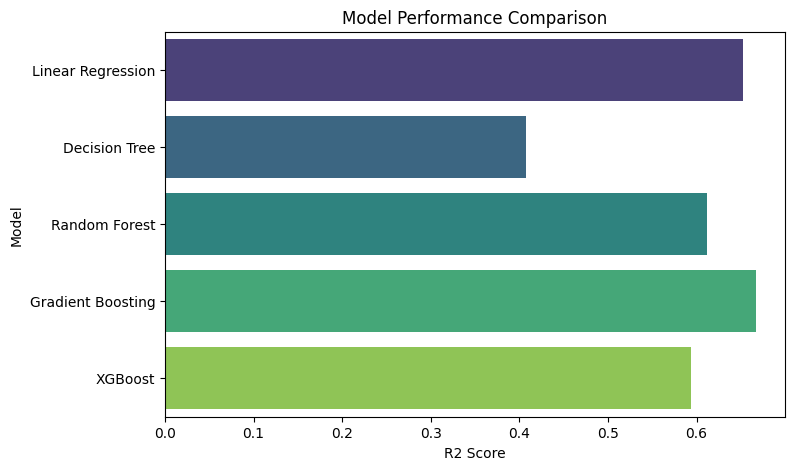

In [92]:
score_df = pd.DataFrame(list(scores.items()), columns=['Model', 'R2 Score'])

plt.figure(figsize=(8,5))
sns.barplot(x='R2 Score', y='Model', data=score_df, palette='viridis')
plt.title("Model Performance Comparison")
plt.show()